# Importing libraries for data handling and reading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#reading the file via read_excel fucntion in pandas
corona_train = pd.read_excel('training_data.xlsx')

In [3]:
corona_train.head()#reading first five values of data

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),...,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
0,1,All,Both,NaN,0.6230,0.4760,0.3000,0.1900,0.0800,0.0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Severe/Critical Only,Both,NaN,0.7037,0.6667,0.4815,0.3148,0.2407,0.0741,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,All,Both,NaN,0.5912,0.4015,0.2336,0.1387,0.0146,0.0146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,All,Both,NaN,0.6030,NaN,NaN,0.1160,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,All,Both,NaN,0.6160,NaN,NaN,0.1010,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
corona_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 91 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        475 non-null    int64  
 1   Severity                                  458 non-null    object 
 2   Ventilation                               301 non-null    object 
 3   Mean Age                                  252 non-null    float64
 4   % Male                                    430 non-null    float64
 5   Any Comorbidity                           222 non-null    float64
 6   Hypertension                              309 non-null    float64
 7   Diabetes                                  325 non-null    float64
 8   Cardiovascular Disease (incl. CAD)        295 non-null    float64
 9   Chronic obstructive lung (COPD)           262 non-null    float64
 10  Cancer (Any)                          

In [5]:
#checking nulls in data
corona_train.isnull().sum()
#seem to be very huge amount of nan data presented in dataset

ID               0
Severity        17
Ventilation    174
Mean Age       223
% Male          45
              ... 
Unnamed: 86    462
Unnamed: 87    464
Unnamed: 88    467
Unnamed: 89    460
Unnamed: 90    439
Length: 91, dtype: int64

### data cleaning

In [6]:
#treating nullss and drop columns having null greater than 20 % of null values
cols = corona_train.columns
cols

Index(['ID', 'Severity', 'Ventilation', 'Mean Age', '% Male',
       'Any Comorbidity', 'Hypertension', 'Diabetes',
       'Cardiovascular Disease (incl. CAD)', 'Chronic obstructive lung (COPD)',
       'Cancer (Any)', 'Liver Disease (any)', 'Cerebrovascular Disease',
       'Chronic kidney/renal disease', 'Other', 'Fever (temperature ≥37·3°C)',
       'Average temperature (celsius)', 'Max temperature (celsius)',
       'Respiratory rate > 24 breaths per min', 'Cough',
       'Shortness of Breath (dyspnoea)', 'Headache', 'Sputum (/Expectoration)',
       'Myalgia (Muscle Pain)', 'Fatigue', 'Diarrhoea', 'Nausea or Vomiting',
       'Loss of Appetite/Anorexia', 'Disease Severity Asymptomatic',
       'Disease Severity General', 'Disease Severity Severe',
       'Disease Severity Critical', 'White Blood Cell Count (10^9/L) - Median',
       'White Blood Cell Count (10^9/L) - LQ',
       'White Blood Cell Count (10^9/L) - UQ',
       'Lymphocyte Count (10^9/L) - Median', 'Lymphocyte Count 

In [7]:
for i in cols:
    val = corona_train[i].isnull().sum()
    if(val>0.7*len(corona_train)):
        corona_train = corona_train.drop(i,axis = 1)
#we remove the columns which have nan values grater than 30 percent because we can't handle those big numbers of nulls

In [8]:
corona_train.head()

,ID,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),...,Lymphocyte Count (10^9/L) - UQ,Platelet Count (10^9/L) - Median,Platelet Count (10^9/L) - LQ,Platelet Count (10^9/L) - UQ,Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Antibiotic,Antiviral (Any),"Hospital length of stay, days",Mortality
0,1,All,Both,NaN,0.6230,0.4760,0.3000,0.1900,0.0800,0.0300,...,1.3,206.0,155.0,262.0,30.0,NaN,0.9476,0.2147,11,0.28
1,1,Severe/Critical Only,Both,NaN,0.7037,0.6667,0.4815,0.3148,0.2407,0.0741,...,0.8,165.5,107.0,229.0,40.0,NaN,0.9815,0.2222,7.5,1
2,1,All,Both,NaN,0.5912,0.4015,0.2336,0.1387,0.0146,0.0146,...,1.5,220.0,168.0,271.0,27.0,NaN,0.9343,0.2117,12,0
3,2,All,Both,NaN,0.6030,NaN,NaN,0.1160,NaN,NaN,...,1.2,207.0,158.0,284.0,33.0,34.0,0.9500,0.4700,15,0.16
4,2,All,Both,NaN,0.6160,NaN,NaN,0.1010,NaN,NaN,...,1.4,201.0,155.0,287.0,33.0,33.0,0.9490,0.9490,14,0.15


In [9]:
corona_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 43 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        475 non-null    int64  
 1   Severity                                  458 non-null    object 
 2   Ventilation                               301 non-null    object 
 3   Mean Age                                  252 non-null    float64
 4   % Male                                    430 non-null    float64
 5   Any Comorbidity                           222 non-null    float64
 6   Hypertension                              309 non-null    float64
 7   Diabetes                                  325 non-null    float64
 8   Cardiovascular Disease (incl. CAD)        295 non-null    float64
 9   Chronic obstructive lung (COPD)           262 non-null    float64
 10  Cancer (Any)                          

In [10]:
corona_train['Hospital length of stay, days'].unique()
# as we see the one value is filled wrong 'na' so we change it with nan

array([11, 7.5, 12, 15, 14, 16, 23.2, nan, 17, 13, 18.5, 4, 14.5, 10, 8.4,
       8.6, 18, 19.5, 13.8, 16.4, 17.22, 17.41, 19.43, 15.7, 15.14, 12.67,
       5, 17.81, 8, 20, 16.68, 16.5, 10.5, 12.2, 11.6, 19, 18.3, 26.5,
       21.25, 11.2, 2, 7, 12.71, 10.56, 9, 12.5, 10.45, 11.16, 9.27, 6.5,
       12.7, 53, 51, 55, 20.8, 21, 23, 4.6, 30, 13.5, 27.5, 39, 16.63,
       17.27, 14.94, 28, 15.08, 22, 26, 23.7, 24.9, 21.9, 25.3, 31, 20.1,
       'na', 12.9, 11.4, 15.4, 22.5, 5.36, 0, 7.31], dtype=object)

In [11]:
#WE replace strings value with nan here
corona_train['Hospital length of stay, days'] = corona_train['Hospital length of stay, days'].replace('na', np.nan)

In [12]:
corona_train['Hospital length of stay, days'].unique()# now it is changed

array([11.  ,  7.5 , 12.  , 15.  , 14.  , 16.  , 23.2 ,   nan, 17.  ,
       13.  , 18.5 ,  4.  , 14.5 , 10.  ,  8.4 ,  8.6 , 18.  , 19.5 ,
       13.8 , 16.4 , 17.22, 17.41, 19.43, 15.7 , 15.14, 12.67,  5.  ,
       17.81,  8.  , 20.  , 16.68, 16.5 , 10.5 , 12.2 , 11.6 , 19.  ,
       18.3 , 26.5 , 21.25, 11.2 ,  2.  ,  7.  , 12.71, 10.56,  9.  ,
       12.5 , 10.45, 11.16,  9.27,  6.5 , 12.7 , 53.  , 51.  , 55.  ,
       20.8 , 21.  , 23.  ,  4.6 , 30.  , 13.5 , 27.5 , 39.  , 16.63,
       17.27, 14.94, 28.  , 15.08, 22.  , 26.  , 23.7 , 24.9 , 21.9 ,
       25.3 , 31.  , 20.1 , 12.9 , 11.4 , 15.4 , 22.5 ,  5.36,  0.  ,
        7.31])

In [13]:
corona_train['Mortality'].unique()
#there is also some mistakes in this columns we need to change it correctly

array([0.28, 1, 0, 0.16, 0.15, 0.17, 0.04, 0.07, 0.06, 0.25, 0.64, 0.55,
       0.79, 0.01, 0.08, 0.22, 0.38, 0.11, 0.1, 0.03, 0.35, 0.67, 0.52,
       0.34, 0.45, 0.2, 0.05, 0.36, 0.23, 0.3, 0.09, 0.49, 0.02, 0.14,
       0.12, 0.21, 0.62, 0.48, 0.47, 0.54, 0.4, 0.63, 0.6, 0.51, 0.5,
       0.27, 0.56, 0.18, 0.29, 0.76, 0.19, 'na', 0.26, '0%%', 0.41, 0.7,
       0.66, 0.42, 0.9, 0.32, 0.39, 0.58], dtype=object)

In [14]:
#we change the string values here to zero
corona_train['Mortality'] = corona_train['Mortality'].replace('na',0)
corona_train['Mortality'] = corona_train['Mortality'].replace('0%%',0)

In [15]:
corona_train['Mortality'].unique()
#now it is changed

array([0.28, 1.  , 0.  , 0.16, 0.15, 0.17, 0.04, 0.07, 0.06, 0.25, 0.64,
       0.55, 0.79, 0.01, 0.08, 0.22, 0.38, 0.11, 0.1 , 0.03, 0.35, 0.67,
       0.52, 0.34, 0.45, 0.2 , 0.05, 0.36, 0.23, 0.3 , 0.09, 0.49, 0.02,
       0.14, 0.12, 0.21, 0.62, 0.48, 0.47, 0.54, 0.4 , 0.63, 0.6 , 0.51,
       0.5 , 0.27, 0.56, 0.18, 0.29, 0.76, 0.19, 0.26, 0.41, 0.7 , 0.66,
       0.42, 0.9 , 0.32, 0.39, 0.58])

In [16]:
#drop_ID column bcz we don't require this
corona_train = corona_train.drop('ID',axis = 1)

In [17]:
#collecting columns with object data type
cols = corona_train.select_dtypes(include=['object']).columns

In [18]:
cols

Index(['Severity', 'Ventilation'], dtype='object')

In [19]:
for column in cols:
    corona_train[column].fillna(corona_train[column].mode()[0], inplace=True)
#filling the categorical value with mode

In [20]:
#changing some column nulls with LQ and UQ
corona_train['White Blood Cell Count (10^9/L) - LQ'] = corona_train['White Blood Cell Count (10^9/L) - LQ'].fillna(corona_train['White Blood Cell Count (10^9/L) - LQ'].quantile(0.25))
corona_train['White Blood Cell Count (10^9/L) - UQ'] = corona_train['White Blood Cell Count (10^9/L) - UQ'].fillna(corona_train['White Blood Cell Count (10^9/L) - UQ'].quantile(0.75))
corona_train['Lymphocyte Count (10^9/L) - LQ'] = corona_train['Lymphocyte Count (10^9/L) - LQ'].fillna(corona_train['Lymphocyte Count (10^9/L) - LQ'].quantile(0.25))
corona_train['Lymphocyte Count (10^9/L) - UQ'] = corona_train['Lymphocyte Count (10^9/L) - UQ'].fillna(corona_train['Lymphocyte Count (10^9/L) - UQ'].quantile(0.75))
corona_train['Platelet Count (10^9/L) - LQ'] = corona_train['Platelet Count (10^9/L) - LQ'].fillna(corona_train['Platelet Count (10^9/L) - LQ'].quantile(0.25))
corona_train['Platelet Count (10^9/L) - UQ'] = corona_train['Platelet Count (10^9/L) - UQ'].fillna(corona_train['Platelet Count (10^9/L) - UQ'].quantile(0.75))

In [21]:
#changing some column nulls with meadian
corona_train['White Blood Cell Count (10^9/L) - Median'] = corona_train['White Blood Cell Count (10^9/L) - Median'].fillna(corona_train['White Blood Cell Count (10^9/L) - Median'].median())
corona_train['Lymphocyte Count (10^9/L) - Median'] = corona_train['Lymphocyte Count (10^9/L) - Median'].fillna(corona_train['Lymphocyte Count (10^9/L) - Median'].median())
corona_train['Platelet Count (10^9/L) - Median'] = corona_train['Platelet Count (10^9/L) - Median'].fillna(corona_train['Platelet Count (10^9/L) - Median'].median())

In [22]:
#now we chnge nulls of remaining columns with mean of itself
corona_train = corona_train.fillna(corona_train.mean())

In [23]:
corona_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 42 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Severity                                  475 non-null    object 
 1   Ventilation                               475 non-null    object 
 2   Mean Age                                  475 non-null    float64
 3   % Male                                    475 non-null    float64
 4   Any Comorbidity                           475 non-null    float64
 5   Hypertension                              475 non-null    float64
 6   Diabetes                                  475 non-null    float64
 7   Cardiovascular Disease (incl. CAD)        475 non-null    float64
 8   Chronic obstructive lung (COPD)           475 non-null    float64
 9   Cancer (Any)                              475 non-null    float64
 10  Liver Disease (any)                   

In [24]:
corona_train.isnull().sum()
#now null values in our data

Severity                                    0
Ventilation                                 0
Mean Age                                    0
% Male                                      0
Any Comorbidity                             0
Hypertension                                0
Diabetes                                    0
Cardiovascular Disease (incl. CAD)          0
Chronic obstructive lung (COPD)             0
Cancer (Any)                                0
Liver Disease (any)                         0
Cerebrovascular Disease                     0
Chronic kidney/renal disease                0
Other                                       0
Fever (temperature ≥37·3°C)                 0
Cough                                       0
Shortness of Breath (dyspnoea)              0
Headache                                    0
Sputum (/Expectoration)                     0
Myalgia (Muscle Pain)                       0
Fatigue                                     0
Diarrhoea                         

In [25]:
cols = corona_train.columns
#extracting columns from traindata

#### Visualization

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mortality', ylabel='Mean Age'>

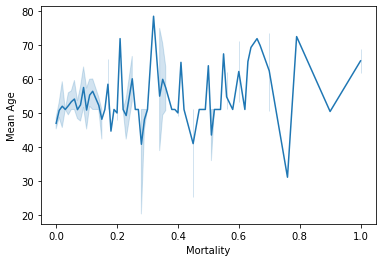

In [26]:
sns.lineplot(corona_train['Mortality'],corona_train['Mean Age'])

### correaltion

<AxesSubplot:>

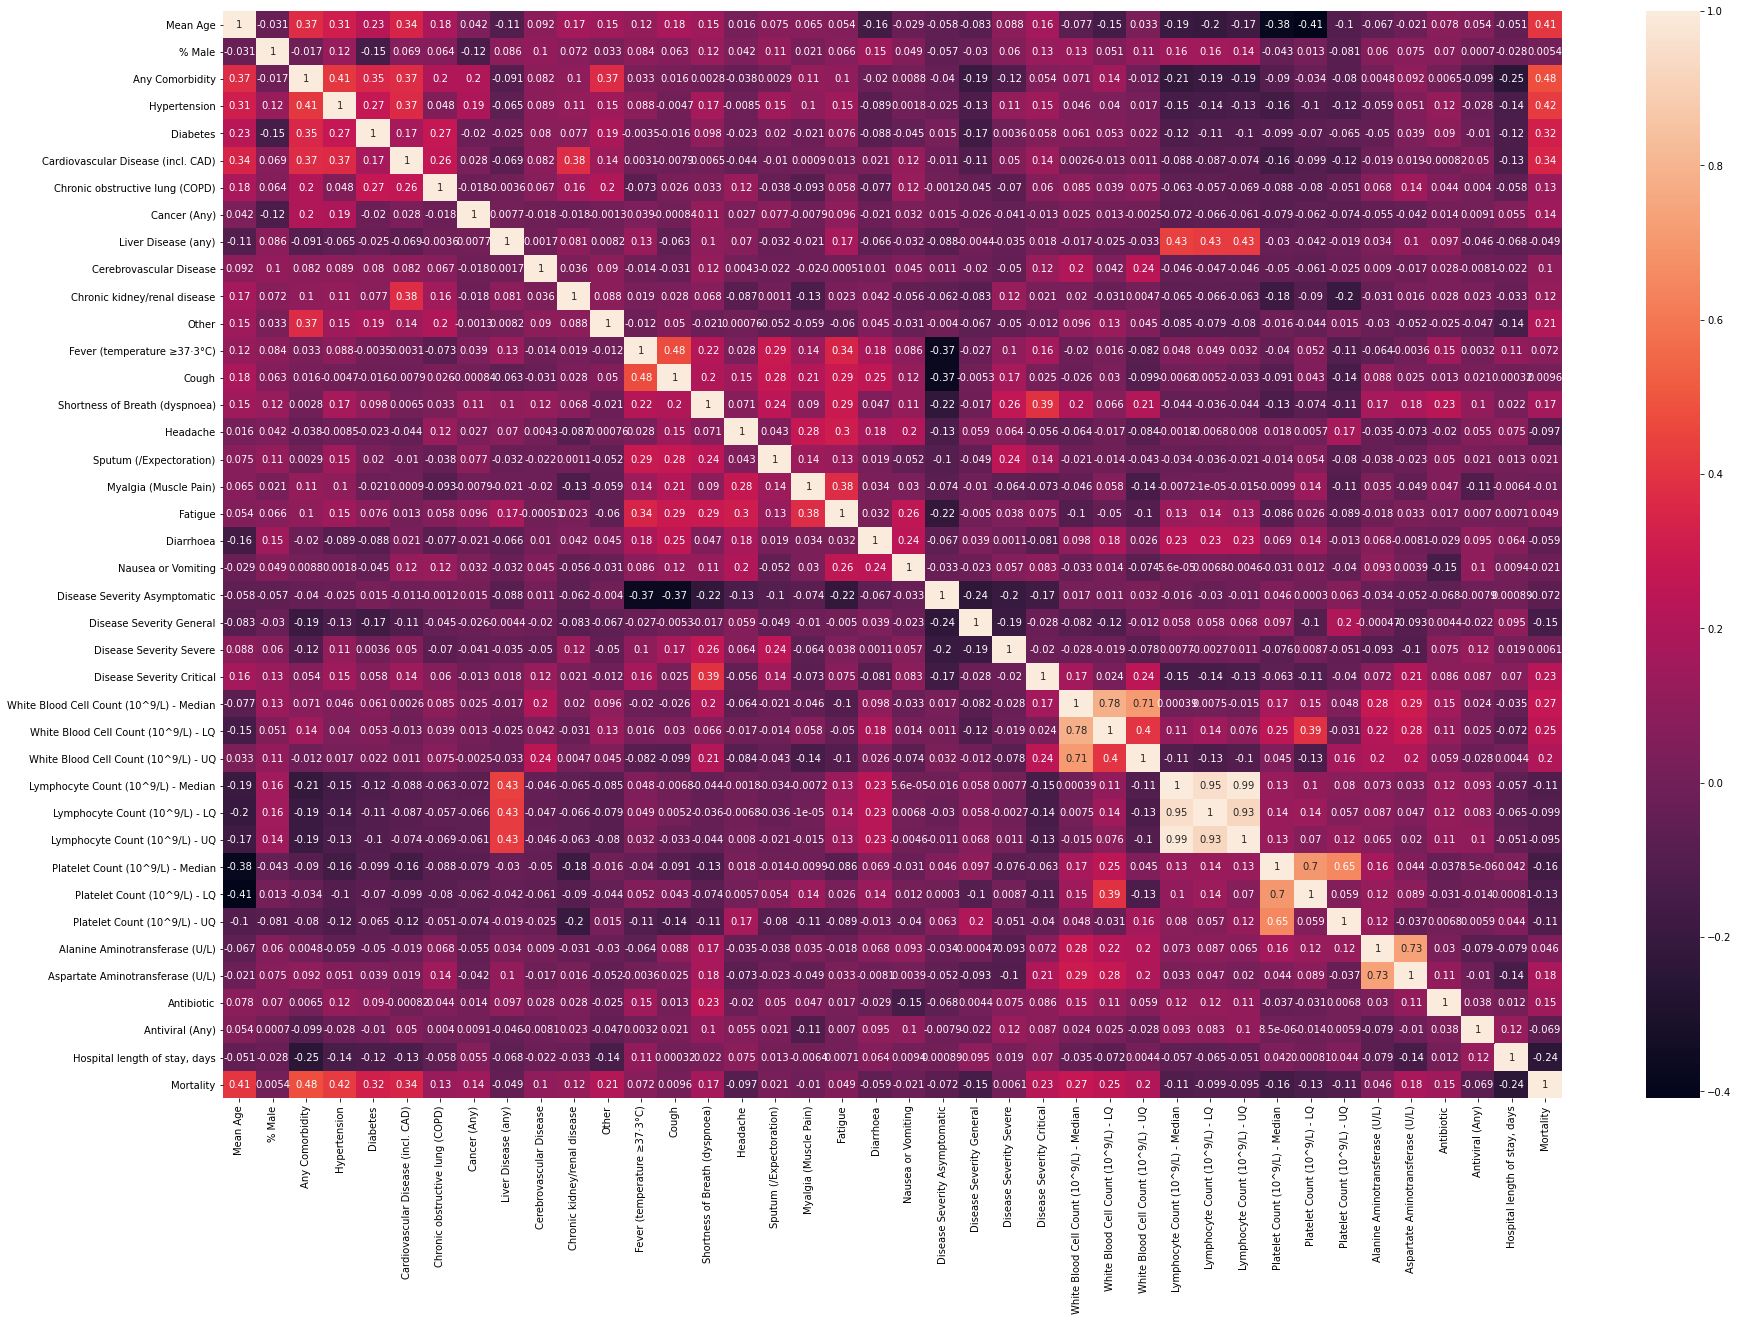

In [27]:
from matplotlib import pyplot as plt
plt.figure(figsize = (30,20))
sns.heatmap(corona_train.corr(),annot = True)

as we seen from the above graph there few vairables which does not have relation with data

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Severity', ylabel='count'>

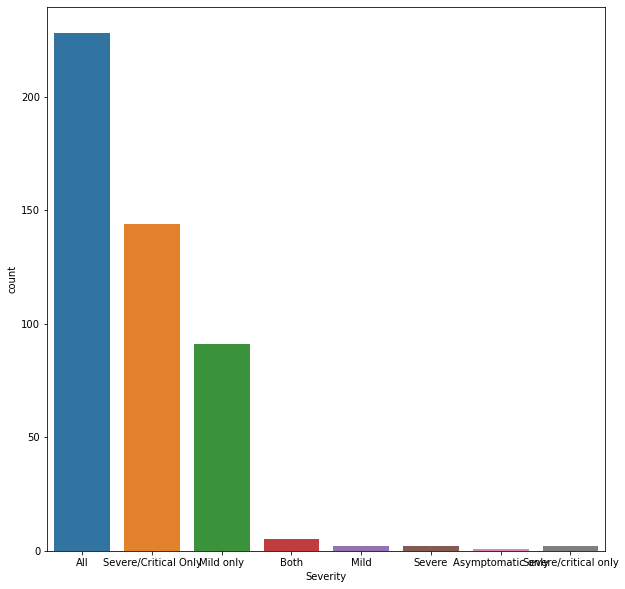

In [28]:
plt.figure(figsize = (10,10))
sns.countplot(corona_train['Severity'])

more person with all sympotoms categories

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ventilation', ylabel='count'>

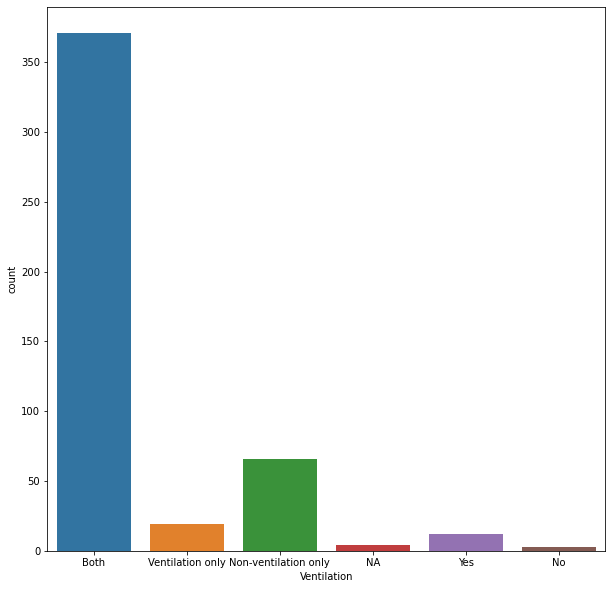

In [29]:
plt.figure(figsize = (10,10))
sns.countplot(corona_train['Ventilation'])

in this there is more data which have both ventilation  

# now treating with testing data

In [30]:
#import testing data
corona_test = pd.read_excel('test_data.xlsx')

In [31]:
corona_test.info()#checking information for data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 54 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        53 non-null     int64  
 1   Severity                                  53 non-null     object 
 2   Ventilation                               46 non-null     object 
 3   Mean Age                                  36 non-null     float64
 4   % Male                                    45 non-null     float64
 5   Any Comorbidity                           14 non-null     float64
 6   Hypertension                              26 non-null     float64
 7   Diabetes                                  30 non-null     float64
 8   Cardiovascular Disease (incl. CAD)        35 non-null     float64
 9   Chronic obstructive lung (COPD)           24 non-null     float64
 10  Cancer (Any)                            

In [32]:
cols_test = corona_test.columns
#extracting columns from testing data

In [33]:
#now we have to select features according to training data so we write foloowing code for that
for i in cols_test:
    if i not in cols:
        corona_test = corona_test.drop(i,axis = 1)

In [34]:
corona_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Severity                                  53 non-null     object 
 1   Ventilation                               46 non-null     object 
 2   Mean Age                                  36 non-null     float64
 3   % Male                                    45 non-null     float64
 4   Any Comorbidity                           14 non-null     float64
 5   Hypertension                              26 non-null     float64
 6   Diabetes                                  30 non-null     float64
 7   Cardiovascular Disease (incl. CAD)        35 non-null     float64
 8   Chronic obstructive lung (COPD)           24 non-null     float64
 9   Cancer (Any)                              25 non-null     float64
 10  Liver Disease (any)                     

##### data cleaning in testing data

In [35]:

corona_test['Ventilation'].fillna(corona_test['Ventilation'].mode()[0], inplace=True)

In [36]:
corona_test['White Blood Cell Count (10^9/L) - LQ'] = corona_test['White Blood Cell Count (10^9/L) - LQ'].fillna(corona_test['White Blood Cell Count (10^9/L) - LQ'].quantile(0.25))
corona_test['White Blood Cell Count (10^9/L) - UQ'] = corona_test['White Blood Cell Count (10^9/L) - UQ'].fillna(corona_test['White Blood Cell Count (10^9/L) - UQ'].quantile(0.75))
corona_test['Lymphocyte Count (10^9/L) - LQ'] = corona_test['Lymphocyte Count (10^9/L) - LQ'].fillna(corona_test['Lymphocyte Count (10^9/L) - LQ'].quantile(0.25))
corona_test['Lymphocyte Count (10^9/L) - UQ'] = corona_test['Lymphocyte Count (10^9/L) - UQ'].fillna(corona_test['Lymphocyte Count (10^9/L) - UQ'].quantile(0.75))
corona_test['Platelet Count (10^9/L) - LQ'] = corona_test['Platelet Count (10^9/L) - LQ'].fillna(corona_test['Platelet Count (10^9/L) - LQ'].quantile(0.25))
corona_test['Platelet Count (10^9/L) - UQ'] = corona_test['Platelet Count (10^9/L) - UQ'].fillna(corona_test['Platelet Count (10^9/L) - UQ'].quantile(0.75))

In [37]:
#changing some column nulls with meadian
corona_test['White Blood Cell Count (10^9/L) - Median'] = corona_test['White Blood Cell Count (10^9/L) - Median'].fillna(corona_test['White Blood Cell Count (10^9/L) - Median'].median())
corona_test['Lymphocyte Count (10^9/L) - Median'] = corona_test['Lymphocyte Count (10^9/L) - Median'].fillna(corona_test['Lymphocyte Count (10^9/L) - Median'].median())
corona_test['Platelet Count (10^9/L) - Median'] = corona_test['Platelet Count (10^9/L) - Median'].fillna(corona_test['Platelet Count (10^9/L) - Median'].median())

In [38]:
#now we chnge nulls of remaining columns with mean of itself
corona_test = corona_test.fillna(corona_test.mean())

In [39]:
corona_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Severity                                  53 non-null     object 
 1   Ventilation                               53 non-null     object 
 2   Mean Age                                  53 non-null     float64
 3   % Male                                    53 non-null     float64
 4   Any Comorbidity                           53 non-null     float64
 5   Hypertension                              53 non-null     float64
 6   Diabetes                                  53 non-null     float64
 7   Cardiovascular Disease (incl. CAD)        53 non-null     float64
 8   Chronic obstructive lung (COPD)           53 non-null     float64
 9   Cancer (Any)                              53 non-null     float64
 10  Liver Disease (any)                     

### change categorical to numeric so that we can apply for algo

In [40]:
#calling algo for encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [41]:
#extracting object data column only
cols_obj = corona_train.select_dtypes(include=['object']).columns

In [42]:
#fitting and transforming
for i in cols_obj:
    corona_train[i] = le.fit_transform(corona_train[i])
    corona_test[i] = le.fit_transform(corona_test[i])

In [43]:
corona_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Severity                                  53 non-null     int32  
 1   Ventilation                               53 non-null     int32  
 2   Mean Age                                  53 non-null     float64
 3   % Male                                    53 non-null     float64
 4   Any Comorbidity                           53 non-null     float64
 5   Hypertension                              53 non-null     float64
 6   Diabetes                                  53 non-null     float64
 7   Cardiovascular Disease (incl. CAD)        53 non-null     float64
 8   Chronic obstructive lung (COPD)           53 non-null     float64
 9   Cancer (Any)                              53 non-null     float64
 10  Liver Disease (any)                     

# outlier_treating

we use IQR here for treating outlierss and sns for visualization

In [44]:
import seaborn as sns

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mean Age'>

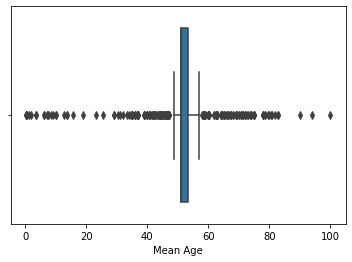

In [45]:
sns.boxplot(corona_train['Mean Age'])

too much outliers in tha data

In [46]:
def iqr_capp(corona, cols, factor):

    for i in cols:

        q1 = corona[i].quantile(0.25)
        q3 = corona[i].quantile(0.75)

        iqr = q3 - q1

        upper = q3 + (factor * iqr)
        lower = q3 - (factor * iqr)

        corona[i] =  np.where(corona[i] > upper, upper, np.where(corona[i] < lower, lower, corona[i]))
    
    return corona

In [47]:
corona_train = iqr_capp(corona_train,corona_train.columns[2:40] , 1.5)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mean Age'>

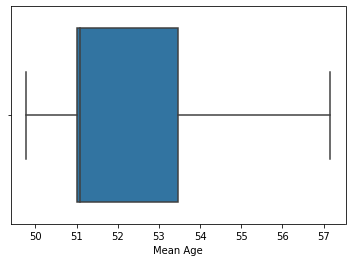

In [48]:
sns.boxplot(corona_train['Mean Age'])

now we see that outliers were removed from trainingdata and do same for testing

In [49]:
corona_test = iqr_capp(corona_test,corona_test.columns[2:40] , 1.5)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mean Age'>

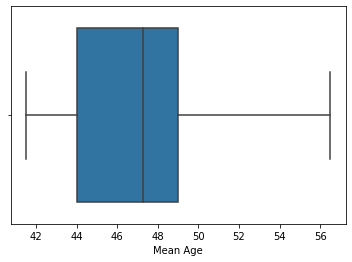

In [50]:
sns.boxplot(corona_test['Mean Age'])

extracting independent and dependent data

In [51]:
X = corona_train.iloc[:,:-1]

In [52]:
X

,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),...,Lymphocyte Count (10^9/L) - LQ,Lymphocyte Count (10^9/L) - UQ,Platelet Count (10^9/L) - Median,Platelet Count (10^9/L) - LQ,Platelet Count (10^9/L) - UQ,Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Antibiotic,Antiviral (Any),"Hospital length of stay, days"
0,0,0,51.093536,0.6230,0.476000,0.300000,0.190000,0.08000,0.030000,0.016800,...,0.6000,1.30,184.485,120.5,262.000,30.000000,34.728409,0.739702,0.786662,11.000000
1,6,0,51.093536,0.7037,0.536074,0.481500,0.278726,0.24070,0.074100,0.000000,...,0.5375,1.21,184.485,117.5,257.545,30.970924,34.728409,0.739702,0.786662,7.500000
2,0,0,51.093536,0.5912,0.432185,0.233600,0.138700,0.01460,0.014600,0.070000,...,0.8000,1.50,184.485,120.5,267.955,28.605815,34.728409,0.739702,0.786662,12.000000
3,0,0,51.093536,0.6030,0.484130,0.286662,0.116000,0.14218,0.066283,0.030000,...,0.6000,1.21,184.485,120.5,267.955,30.970924,34.000000,0.739702,0.786662,15.000000
4,0,0,51.093536,0.6160,0.484130,0.286662,0.101000,0.14218,0.066283,0.051000,...,0.6000,1.40,184.485,120.5,267.955,30.970924,33.635795,0.739702,0.949000,14.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,6,0,51.093536,0.6630,0.484130,0.388000,0.122000,0.09200,0.066283,0.041000,...,0.6000,1.75,184.485,118.0,262.750,29.788370,34.728409,0.739702,0.842674,15.151758
471,0,0,51.093536,0.6600,0.484130,0.502155,0.278726,0.19000,0.090000,0.070000,...,0.6000,1.75,184.485,118.0,262.750,29.788370,34.728409,0.739702,0.842674,15.151758
472,6,0,57.162500,0.5900,0.536074,0.433600,0.236800,0.07020,0.066283,0.075804,...,0.6000,1.75,184.485,118.0,262.750,29.788370,34.728409,0.739702,0.842674,15.151758
473,6,0,57.162500,0.5600,0.536074,0.460000,0.250000,0.09000,0.066283,0.075804,...,0.6000,1.75,184.485,118.0,262.750,29.788370,34.728409,0.739702,0.842674,15.151758


In [53]:
y = corona_train.iloc[:,-1:]

In [54]:
y

,Mortality
0,0.28
1,1.00
2,0.00
3,0.16
4,0.15
...,...
470,0.56
471,0.58
472,1.00
473,0.00


##### feature scaling

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)

### applying linear model

In [56]:
from sklearn import linear_model #Parametric Model

In [57]:
reg = linear_model.LinearRegression()

In [58]:
reg.fit(X,y)

LinearRegression()

In [59]:
y_pred = reg.predict(X)

In [60]:
y_pred

array([[ 0.27161998],
       [ 0.76403217],
       [-0.02970418],
       [ 0.22269342],
       [ 0.15878189],
       [ 0.20455321],
       [-0.05882982],
       [ 0.12697987],
       [-0.14013365],
       [-0.00888827],
       [-0.17050493],
       [ 0.09150151],
       [-0.07070432],
       [ 0.09441046],
       [ 0.04950041],
       [ 0.38660152],
       [ 0.58087833],
       [ 0.64104304],
       [ 0.61237398],
       [ 0.77153919],
       [ 0.08125206],
       [ 0.19991762],
       [ 0.09966888],
       [-0.09018306],
       [-0.10544455],
       [-0.07026474],
       [-0.01825234],
       [-0.07111011],
       [-0.12852306],
       [-0.01403052],
       [-0.01959518],
       [-0.04097823],
       [ 0.43903107],
       [ 0.17499855],
       [ 0.13852213],
       [ 0.3456504 ],
       [ 0.41220108],
       [ 0.16959671],
       [ 0.12647422],
       [ 0.32806632],
       [-0.00728308],
       [ 0.30434497],
       [ 0.17267559],
       [ 0.43059538],
       [ 0.34992616],
       [ 0

In [61]:
from sklearn.metrics import r2_score, mean_squared_error

In [62]:
score_lin = r2_score(y,y_pred)
score_lin

0.5078052607963848

In [63]:
mean_squared_error(y,y_pred)

0.051260943032175856

# Important Features

In [64]:
cols = corona_train.iloc[:,:-1].columns
len(cols)

41

In [65]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X, y)
mutual_info

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0.09850817, 0.04586781, 0.11131022, 0.08698645, 0.13136858,
       0.13766776, 0.107764  , 0.12626398, 0.07051324, 0.06399593,
       0.0430324 , 0.0861686 , 0.14497957, 0.09178656, 0.10424781,
       0.06371435, 0.05029679, 0.03255154, 0.02371557, 0.01657514,
       0.03564557, 0.07870572, 0.        , 0.01226336, 0.03970971,
       0.01463253, 0.01169968, 0.02831648, 0.        , 0.06516798,
       0.13508259, 0.13822551, 0.08468002, 0.00581977, 0.        ,
       0.02934851, 0.03114129, 0.0127972 , 0.        , 0.00497265,
       0.07284821])

In [66]:
mutual_info = pd.Series(mutual_info)

#ss = mutual_info.sort_values(ascending=False)
#ss
len(mutual_info)

41

In [67]:
imp_feat = pd.DataFrame({'cols':cols,'value' : mutual_info})

In [68]:
imp_feat

,cols,value
0,Severity,0.098508
1,Ventilation,0.045868
2,Mean Age,0.111310
3,% Male,0.086986
4,Any Comorbidity,0.131369
5,Hypertension,0.137668
6,Diabetes,0.107764
7,Cardiovascular Disease (incl. CAD),0.126264
8,Chronic obstructive lung (COPD),0.070513
9,Cancer (Any),0.063996


In [69]:
imp_feat = imp_feat.sort_values('value',ascending = False).reset_index()

In [70]:
imp_feat = imp_feat.drop('index',axis = 1)

In [71]:
imp_feat

,cols,value
0,Chronic kidney/renal disease,0.144980
1,Lymphocyte Count (10^9/L) - LQ,0.138226
2,Hypertension,0.137668
3,Lymphocyte Count (10^9/L) - Median,0.135083
4,Any Comorbidity,0.131369
5,Cardiovascular Disease (incl. CAD),0.126264
6,Mean Age,0.111310
7,Diabetes,0.107764
8,Fever (temperature ≥37·3°C),0.104248
9,Severity,0.098508


In [72]:
df_imp = imp_feat['cols'].iloc[:11]

In [73]:
X = corona_train.iloc[:,:-1]
y = corona_train.iloc[:,-1:]

In [74]:
df_imp_feat = X[['Any Comorbidity','Chronic kidney/renal disease','Cardiovascular Disease (incl. CAD)','Severity','% Male',
                 'Fever (temperature ≥37·3°C)','Lymphocyte Count (10^9/L) - LQ',
                 'Cough','White Blood Cell Count (10^9/L) - UQ',]]

In [75]:
df_imp_feat['Mortality'] = y

<ipython-input-75-d5750ec8fc66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp_feat['Mortality'] = y


In [76]:
df_imp_feat

,Any Comorbidity,Chronic kidney/renal disease,Cardiovascular Disease (incl. CAD),Severity,% Male,Fever (temperature ≥37·3°C),Lymphocyte Count (10^9/L) - LQ,Cough,White Blood Cell Count (10^9/L) - UQ,Mortality
0,0.476000,0.016800,0.08000,0,0.6230,0.9400,0.6000,0.790000,9.50,0.28
1,0.536074,0.037000,0.24070,6,0.7037,0.9444,0.5375,0.722200,11.65,1.00
2,0.432185,0.000000,0.01460,0,0.5912,0.9416,0.8000,0.817500,7.70,0.00
3,0.484130,0.044744,0.14218,0,0.6030,0.9150,0.6000,0.603716,9.40,0.16
4,0.484130,0.044744,0.14218,0,0.6160,0.8990,0.6000,0.603716,9.60,0.15
...,...,...,...,...,...,...,...,...,...,...
470,0.484130,0.044744,0.09200,6,0.6630,0.8570,0.6000,0.704000,11.65,0.56
471,0.484130,0.111861,0.19000,0,0.6600,0.7100,0.6000,0.660000,8.80,0.58
472,0.536074,0.000000,0.07020,6,0.5900,0.5675,0.6000,0.603716,8.30,1.00
473,0.536074,0.000000,0.09000,6,0.5600,0.5675,0.6000,0.603716,8.30,0.00


# Random_forest

**without important featues**

In [77]:
X = corona_train.iloc[:,:-1]
y = corona_train.iloc[:,-1:]

In [78]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(X, y)

<ipython-input-78-88cf86d3d6c7>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X, y)


RandomForestRegressor(random_state=42)

In [79]:
predictions = rf.predict(X)

In [80]:
score_rf = r2_score(y,predictions)
score_rf

0.9326977257920412

In [81]:
X = df_imp_feat.iloc[:,:-1]
y = df_imp_feat.iloc[:,-1:]

**with Important features**

In [82]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf_imp = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf_imp.fit(X, y)

<ipython-input-82-4a8b098afb29>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_imp.fit(X, y)


RandomForestRegressor(random_state=42)

In [83]:
predictions_imp = rf_imp.predict(X)

In [84]:
score_rf_imp = r2_score(y,predictions_imp)
score_rf_imp

0.9309422545137421

In [85]:
mean_squared_error(y,predictions_imp)

0.007192204376319273

In [86]:
mean_squared_error(y,predictions_imp,squared = False)

0.0848068651485201

# SVM

###### without important features

In [87]:
X = corona_train.iloc[:,:-1]
y = corona_train.iloc[:,-1:]

In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)

In [89]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [90]:
y_pred_svm = regressor.predict(X)

In [91]:
score_svm = r2_score(y,y_pred_svm)
score_svm

0.820414520907813

# predicting Testing data

### with important features

In [92]:
cols_imp = df_imp_feat.iloc[:,:-1].columns

In [93]:
cols_imp

Index(['Any Comorbidity', 'Chronic kidney/renal disease',
       'Cardiovascular Disease (incl. CAD)', 'Severity', '% Male',
       'Fever (temperature ≥37·3°C)', 'Lymphocyte Count (10^9/L) - LQ',
       'Cough', 'White Blood Cell Count (10^9/L) - UQ'],
      dtype='object')

In [94]:
df_test = corona_test[cols_imp]

In [95]:
df_test

,Any Comorbidity,Chronic kidney/renal disease,Cardiovascular Disease (incl. CAD),Severity,% Male,Fever (temperature ≥37·3°C),Lymphocyte Count (10^9/L) - LQ,Cough,White Blood Cell Count (10^9/L) - UQ
0,0.527457,0.026187,0.063000,3,0.429400,0.730000,0.6,0.611000,9.425
1,0.527457,0.026187,0.110000,4,0.750000,0.638832,0.6,0.550631,9.425
2,0.527457,0.026187,0.180000,4,0.790000,0.638832,0.6,0.550631,9.425
3,0.527457,0.026187,0.011514,4,0.680000,0.638832,0.6,0.550631,9.425
4,0.527457,0.026187,0.073300,0,0.465400,0.808000,0.6,0.571500,9.425
5,0.527457,0.026187,0.061000,0,0.429400,0.743900,0.6,0.523496,9.425
6,0.527457,0.026187,0.037000,0,0.493800,0.765400,0.6,0.604900,9.425
7,0.527457,0.026187,0.122000,0,0.609800,0.914600,0.6,0.634100,9.425
8,0.527457,0.026187,0.165971,0,0.519800,1.000000,0.6,0.550631,9.425
9,0.527457,0.026187,0.165971,0,0.588000,1.000000,0.6,0.550631,9.425


# as we seen from above predictions random forest is best so we can apply that for predicting mortality of test data

In [96]:
y_pred_rf = rf_imp.predict(df_test)

In [97]:
df_test['Mortality'] = y_pred_rf

<ipython-input-97-85c172c90ee9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Mortality'] = y_pred_rf


In [98]:
df_test

,Any Comorbidity,Chronic kidney/renal disease,Cardiovascular Disease (incl. CAD),Severity,% Male,Fever (temperature ≥37·3°C),Lymphocyte Count (10^9/L) - LQ,Cough,White Blood Cell Count (10^9/L) - UQ,Mortality
0,0.527457,0.026187,0.063000,3,0.429400,0.730000,0.6,0.611000,9.425,0.192500
1,0.527457,0.026187,0.110000,4,0.750000,0.638832,0.6,0.550631,9.425,0.138829
2,0.527457,0.026187,0.180000,4,0.790000,0.638832,0.6,0.550631,9.425,0.122529
3,0.527457,0.026187,0.011514,4,0.680000,0.638832,0.6,0.550631,9.425,0.073200
4,0.527457,0.026187,0.073300,0,0.465400,0.808000,0.6,0.571500,9.425,0.118900
5,0.527457,0.026187,0.061000,0,0.429400,0.743900,0.6,0.523496,9.425,0.193300
6,0.527457,0.026187,0.037000,0,0.493800,0.765400,0.6,0.604900,9.425,0.112900
7,0.527457,0.026187,0.122000,0,0.609800,0.914600,0.6,0.634100,9.425,0.166900
8,0.527457,0.026187,0.165971,0,0.519800,1.000000,0.6,0.550631,9.425,0.140900
9,0.527457,0.026187,0.165971,0,0.588000,1.000000,0.6,0.550631,9.425,0.129600


###### Without important features

In [99]:
predictions = rf.predict(corona_test)

In [100]:
predictions

array([0.1926, 0.1674, 0.188 , 0.1025, 0.1307, 0.1304, 0.1341, 0.1526,
       0.2283, 0.203 , 0.2466, 0.1739, 0.1795, 0.2   , 0.1556, 0.1801,
       0.2258, 0.2859, 0.1813, 0.0967, 0.2859, 0.2061, 0.1764, 0.2174,
       0.1245, 0.1193, 0.1105, 0.1566, 0.2052, 0.1814, 0.2394, 0.2682,
       0.2603, 0.2576, 0.27  , 0.2062, 0.2325, 0.1982, 0.3637, 0.2515,
       0.3251, 0.2061, 0.2061, 0.2061, 0.1681, 0.2095, 0.153 , 0.2112,
       0.2699, 0.3322, 0.2508, 0.268 , 0.2543])

In [101]:
corona_test['Mortality'] = predictions

In [102]:
corona_test

,Severity,Ventilation,Mean Age,% Male,Any Comorbidity,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),...,Lymphocyte Count (10^9/L) - UQ,Platelet Count (10^9/L) - Median,Platelet Count (10^9/L) - LQ,Platelet Count (10^9/L) - UQ,Alanine Aminotransferase (U/L),Aspartate Aminotransferase (U/L),Antibiotic,Antiviral (Any),"Hospital length of stay, days",Mortality
0,3,0,48.900000,0.429400,0.527457,0.238898,0.119000,0.063000,0.078446,0.063000,...,1.3925,178.695,133.0,223.66,25.284706,31.285714,0.784667,0.958083,15.08,0.1926
1,4,0,47.260926,0.750000,0.527457,0.250000,0.170000,0.110000,0.110000,0.058504,...,1.3925,178.695,133.0,223.66,25.284706,31.285714,0.784667,0.958083,16.00,0.1674
2,4,2,47.260926,0.790000,0.527457,0.260000,0.240000,0.180000,0.115115,0.058504,...,1.3925,178.695,133.0,223.66,25.284706,31.285714,0.784667,0.958083,17.00,0.1880
3,4,1,47.260926,0.680000,0.527457,0.238898,0.102608,0.011514,0.050000,0.058504,...,1.3925,178.695,133.0,223.66,25.284706,31.285714,0.784667,0.958083,13.00,0.1025
4,0,0,52.943333,0.465400,0.527457,0.238898,0.102608,0.073300,0.041777,0.048298,...,1.3925,178.695,133.0,223.66,25.284706,31.285714,0.784667,0.958083,15.08,0.1307
5,0,0,44.740000,0.429400,0.527457,0.238898,0.102608,0.061000,0.041777,0.048298,...,1.3925,178.695,133.0,223.66,25.284706,31.285714,0.784667,0.958083,15.08,0.1304
6,0,0,52.680000,0.493800,0.527457,0.238898,0.102608,0.037000,0.049400,0.048298,...,1.3925,178.695,133.0,223.66,25.284706,31.285714,0.784667,0.958083,15.08,0.1341
7,0,0,56.500000,0.609800,0.527457,0.329300,0.146300,0.122000,0.041777,0.068710,...,1.3925,178.695,133.0,223.66,25.284706,31.285714,0.784667,0.958083,15.08,0.1526
8,0,0,41.500000,0.519800,0.527457,0.302204,0.233683,0.165971,0.078446,0.058504,...,1.3925,178.695,133.0,223.66,25.284706,31.285714,0.784667,0.958083,15.08,0.2283
9,0,0,41.500000,0.588000,0.527457,0.302204,0.233683,0.165971,0.078446,0.058504,...,1.3925,178.695,133.0,223.66,25.284706,31.285714,0.784667,0.958083,11.50,0.2030


In [103]:
df_test_new = pd.read_excel('test_data.xlsx') 

In [104]:
df_new = df_test_new[['ID']]

In [105]:
df_new['Mortality'] = y_pred_rf

<ipython-input-105-9a08b2342b35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Mortality'] = y_pred_rf


In [106]:
df_new

,ID,Mortality
0,155,0.192500
1,156,0.138829
2,156,0.122529
3,156,0.073200
4,157,0.118900
5,157,0.193300
6,157,0.112900
7,157,0.166900
8,158,0.140900
9,158,0.129600


In [107]:
#now we make submission.csv for predicting data
df_new.to_csv('submission1.csv')

#### Decision Tree

with whole dataset

In [108]:
X = corona_train.iloc[:,:-1]
y = corona_train.iloc[:,-1:]

In [128]:
DecisionTreeRegressor?

In [130]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(criterion = 'mse' ,random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [131]:
# test the output
y_pred_dt = regressor.predict(X)

In [132]:
y_pred_dt

array([0.28      , 1.        , 0.        , 0.16      , 0.15      ,
       0.17      , 0.04      , 0.        , 0.        , 0.07      ,
       0.07      , 0.        , 0.        , 0.06      , 0.        ,
       0.25      , 0.64      , 0.55      , 0.79      , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01      , 0.        ,
       0.08      , 0.22      , 0.        , 0.15      , 0.38      ,
       0.04      , 0.11      , 0.01      , 0.01      , 0.04      ,
       0.17      , 0.        , 0.        , 0.1       , 0.01      ,
       0.        , 0.03      , 0.        , 0.        , 0.        ,
       0.35      , 1.        , 0.        , 0.67      , 0.        ,
       0.        , 0.        , 1.        , 0.22      , 0.52      ,
       0.        , 0.01      , 0.01      , 0.08      , 0.01      ,
       0.07      , 0.        , 0.        , 0.        , 0.     

In [133]:
r2_score(y,y_pred_dt)

0.9953594912639775

In [134]:
X = df_imp_feat.iloc[:,:-1]
y = df_imp_feat.iloc[:,-1:]

In [135]:
X

,Any Comorbidity,Chronic kidney/renal disease,Cardiovascular Disease (incl. CAD),Severity,% Male,Fever (temperature ≥37·3°C),Lymphocyte Count (10^9/L) - LQ,Cough,White Blood Cell Count (10^9/L) - UQ
0,0.476000,0.016800,0.08000,0,0.6230,0.9400,0.6000,0.790000,9.50
1,0.536074,0.037000,0.24070,6,0.7037,0.9444,0.5375,0.722200,11.65
2,0.432185,0.000000,0.01460,0,0.5912,0.9416,0.8000,0.817500,7.70
3,0.484130,0.044744,0.14218,0,0.6030,0.9150,0.6000,0.603716,9.40
4,0.484130,0.044744,0.14218,0,0.6160,0.8990,0.6000,0.603716,9.60
...,...,...,...,...,...,...,...,...,...
470,0.484130,0.044744,0.09200,6,0.6630,0.8570,0.6000,0.704000,11.65
471,0.484130,0.111861,0.19000,0,0.6600,0.7100,0.6000,0.660000,8.80
472,0.536074,0.000000,0.07020,6,0.5900,0.5675,0.6000,0.603716,8.30
473,0.536074,0.000000,0.09000,6,0.5600,0.5675,0.6000,0.603716,8.30


#### with important features

In [136]:
# create a regressor object
regressor_imp = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor_imp.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [137]:
# test the output
y_pred_dt_imp = regressor_imp.predict(X)

In [138]:
r2_score(y,y_pred_dt_imp)

0.9953594912639775

In [139]:
#as it showing veryy high accuracy for data so we also use it for testing prediction...
#but it may  also cause overfitting

In [140]:
y_pred_dt_test = regressor_imp.predict(df_test.drop('Mortality',axis = 1))

In [141]:
y_pred_dt_test

array([0.35, 0.36, 0.  , 0.1 , 0.  , 0.6 , 0.  , 0.2 , 0.04, 0.04, 0.04,
       0.  , 0.35, 0.2 , 0.22, 0.2 , 0.35, 0.28, 0.  , 0.  , 0.28, 0.03,
       0.22, 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01,
       0.01, 0.  , 0.12, 0.12, 0.12, 0.28, 0.6 , 0.  , 0.03, 0.03, 0.03,
       0.  , 0.  , 0.02, 0.03, 0.12, 0.12, 0.12, 0.12, 0.03])

In [142]:
df_new_dt = df_test_new[['ID']]

In [143]:
df_new_dt['Mortality'] = y_pred_dt_test

<ipython-input-143-a33ee2bb940b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_dt['Mortality'] = y_pred_dt_test


In [144]:
df_new_dt

,ID,Mortality
0,155,0.35
1,156,0.36
2,156,0.00
3,156,0.10
4,157,0.00
5,157,0.60
6,157,0.00
7,157,0.20
8,158,0.04
9,158,0.04


In [145]:
#now we make submission.csv for predicting data
df_new_dt.to_csv('submission1_dt.csv')